In [589]:
#Creating Dataset
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [590]:
#Load Dataset
Home_data = pd.read_csv('HomeC.csv')
nan_removed = pd.DataFrame.dropna(pd.DataFrame(Home_data))
nan_removed.value_counts()

C:\Users\M-SI\AppData\Local\Temp\ipykernel_20392\675098868.py:2: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  Home_data = pd.read_csv('HomeC.csv')


time        use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  Kitchen 14 [kW]  Kitchen 38 [kW]  Barn [kW]  Well [kW]  Microwave [kW]  Living room [kW]  Solar [kW]  temperature  icon         humidity  visibility  summary     apparentTemperature  pressure  windSpeed  cloudCover  windBearing  precipIntensity  dewPoint  precipProbability
1451624400  0.932833  0.003483  0.932833            0.000033         0.020700        0.061917        0.442633          0.124150     0.006983          0.013083          0.000417         0.000150         0.000000         0.031350   0.001017   0.004067        0.001517          0.003483    36.14        clear-night  0.62      10.00       Clear       29.26                1016.91   9.18       cloudCover  282.0        0.0000           24.40     0.00                 1
1451960350  0.498450  0.054750  0.498450            0.000000         0.020100

In [591]:
# get random data from dataset
random_data = nan_removed.sample(n=5000)
random_data

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
105633  1451730033  0.713233  0.009567            0.713233         0.000033   
139740  1451764140  0.811133  0.003617            0.811133         0.000033   
405190  1452029590  0.152183  0.122667            0.152183         0.000017   
326188  1451950588  4.644883  0.388100            4.644883         0.000067   
212053  1451836453  0.231067  0.024383            0.231067         0.000000   
...            ...       ...       ...                 ...              ...   
456544  1452080944  0.298083  0.004267            0.298083         0.000000   
252723  1451877123  0.083050  0.390533            0.083050         0.000017   
17104   1451641504  0.897283  0.003317            0.897283         0.000017   
345420  1451969820  0.605517  0.003483            0.605517         0.000000   
321426  1451945826  0.594283  0.001083            0.594283         0.000000   

        Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
105633        0.150467        0.063483          0.040150     0.004867   
139740        0.495733        0.078050          0.041067     0.004717   
405190        0.020267        0.065600          0.039550     0.005150   
326188        0.020000        0.360133          0.037750     0.154517   
212053        0.019550        0.064183          0.027083     0.005100   
...                ...             ...               ...          ...   
456544        0.020850        0.062900          0.042750     0.005133   
252723        0.020283        0.067517          0.040350     0.005167   
17104         0.020800        0.062967          0.419683     0.120033   
345420        0.020333        0.080000          0.041650     0.124750   
321426        0.020767        0.066283          0.041500     0.137467   

        Wine cellar [kW]  ...  visibility        summary  apparentTemperature  \
105633          0.028917  ...       10.00        Drizzle                46.41   
139740          0.013283  ...       10.00          Clear                27.33   
405190          0.007783  ...       10.00          Clear                56.18   
326188          0.153783  ...        9.92          Clear                52.05   
212053          0.007033  ...       10.00          Clear                69.50   
...                  ...  ...         ...            ...                  ...   
456544          0.016167  ...        2.38  Partly Cloudy                35.97   
252723          0.010167  ...       10.00  Partly Cloudy                80.46   
17104           0.095817  ...        9.70          Clear                 9.42   
345420          0.159933  ...        9.56          Clear                65.44   
321426          0.151233  ...       10.00          Clear                84.20   

        pressure  windSpeed  cloudCover  windBearing  precipIntensity  \
105633   1010.44       7.28         1.0        151.0           0.0052   
139740   1024.75      10.47         0.0        319.0           0.0000   
405190   1020.07       3.69         0.0        337.0           0.0000   
326188   1023.71       1.22        0.01        335.0           0.0000   
212053   1019.95       7.54        0.06         12.0           0.0000   
...          ...        ...         ...          ...              ...   
456544   1020.21       1.74        0.31        346.0           0.0000   
252723   1014.89       5.52        0.34        304.0           0.0000   
17104    1006.25      15.98        0.09        281.0           0.0000   
345420   1016.19      12.41        0.18         26.0           0.0000   
321426   1013.34       4.51        0.18        289.0           0.0000   

        dewPoint  precipProbability  
105633     45.17               0.22  
139740      9.78               0.00  
405190     48.97               0.00  
326188     48.42               0.00  
212053     53.48               0.00  
...          ...                ...  
456544     35.18               0.00  
252723     51.17               0.0

In [592]:
# split the dataframe into 3 type of summary Clear, Cloudy, and other
clear = random_data[random_data['summary'] == 'Clear']
cloudy = random_data[random_data['summary'] == 'Partly Cloudy']
other = random_data[(random_data['summary'] != 'Clear') & (random_data['summary'] != 'Partly Cloudy')]
other['summary'] = 'Other'

C:\Users\M-SI\AppData\Local\Temp\ipykernel_20392\211168837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other['summary'] = 'Other'


In [593]:
# combine the 3 dataframe into 1
frames = [clear, cloudy, other]
result = pd.concat(frames)

# change the summary into numerical value
result['summary'] = result['summary'].map({'Clear': 0, 'Partly Cloudy': -1, 'Other': 1})
result = result.reset_index(drop=True)

In [594]:
#Generating SVM soft Margin
class SVM_soft_margin:

    def __init__(self, alpha = 0.001, lambda_ = 0.01, n_iterations = 1000):
        self.alpha = alpha # learning rate
        self.lambda_ = lambda_ # tradeoff
        self.n_iterations = n_iterations # number of iterations
        self.w = None # weights or slopes
        self.b = None # intercept


    def fit(self, X, y):
        
        n_samples, n_features = X.shape        
        self.w = np.zeros(n_features) # initalizing with 0
        self.b = 0 # initialize with 0
        
        for iteration in range(self.n_iterations):
            for i, Xi in enumerate(X):
                # yixiw-b≥1
                if y[i] * (np.dot(Xi, self.w) - self.b) >= 1 : 
                    self.w -= self.alpha * (2 * self.lambda_ * self.w) # w = w + α* (2λw - yixi)
                else:
                    self.w -= self.alpha * (2 * self.lambda_ * self.w - np.dot(Xi, y[i])) # w = w + α* (2λw - yixi)
                    self.b -= self.alpha * y[i] # b = b - α* (yi)
        return self.w, self.b


    def predict(self, X):
        pred = np.dot(X, self.w) - self.b 
        result = [1 if val > 0 else -1 for val in pred] # returning in the form of -1 and 1
        return result

In [595]:
def get_hyperplane(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

In [596]:
def plot_svm(X, y, w, b, title ='Plot for linear SVM'):    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane(x0_1, w, b, 0)
    x1_2 = get_hyperplane(x0_2, w, b, 0)

    x1_1_m = get_hyperplane(x0_1, w, b, -1)
    x1_2_m = get_hyperplane(x0_2, w, b, -1)

    x1_1_p = get_hyperplane(x0_1, w, b, 1)
    x1_2_p = get_hyperplane(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-1,x1_max+1])
    
    plt.title(title)
    plt.show()

In [597]:
# select the best x values with y values is result['summary'] for using SVM with the best accuracy
X1 = result[['use [kW]','temperature']].values
X2 = result[['visibility','dewPoint']].values
X3 = result[['temperature', 'humidity']].values

# select the best y values with y values is result['summary'] for using SVM with the best accuracy
y = result['summary'].values
# y = np.where(y == 0, -1, 1)

In [598]:
#Implementing into each Datasets
svm1 = SVM_soft_margin()
w1,b1 = svm1.fit(X1,y)

For dataset 1, score:  0.1332


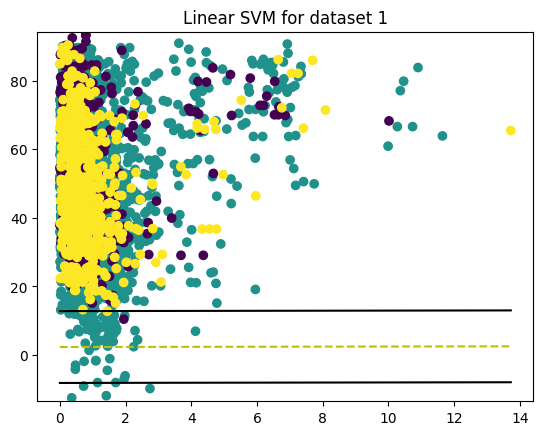

In [599]:
print("For dataset 1, score: ", accuracy_score(svm1.predict(X1),y))
plot_svm(X1, y, w1, b1, title= 'Linear SVM for dataset 1')

In [600]:
#Implementing into each Datasets
svm2 = SVM_soft_margin()
w2,b2 = svm2.fit(X2,y)

For dataset 2, score:  0.133


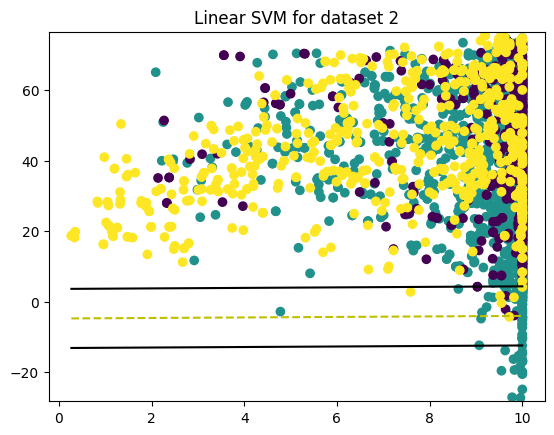

In [601]:
print("For dataset 2, score: ", accuracy_score(svm2.predict(X2),y))
plot_svm(X2, y, w2, b2, title= 'Linear SVM for dataset 2')

In [602]:
#Implementing into each Datasets
svm3 = SVM_soft_margin()
w3,b3 = svm3.fit(X3,y)

For dataset 3, score:  0.1332


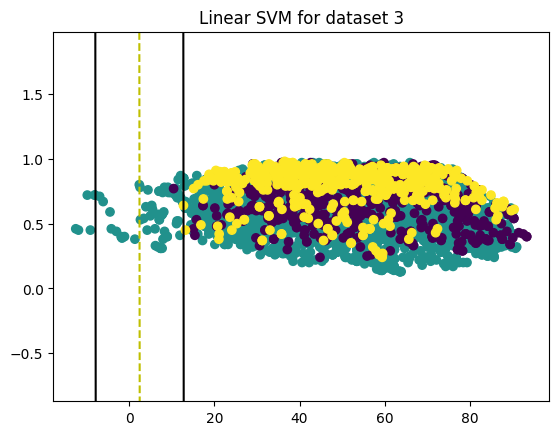

In [603]:
print("For dataset 3, score: ", accuracy_score(svm3.predict(X3),y))
plot_svm(X3, y, w3, b3, title= 'Linear SVM for dataset 3')